In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import shutil
import pandas as pd

csv_file_path = '/content/drive/MyDrive/Tidy room nss/clustering_data.csv'

destination_path = '/content/clustering_data.csv'
shutil.copy(csv_file_path, destination_path)

df = pd.read_csv(destination_path)

print(df.head(55))

               CircleName              RegionName             DivisionName  \
0   Andhra Pradesh Circle          Kurnool Region        Hindupur Division   
1   Andhra Pradesh Circle          Kurnool Region        Hindupur Division   
2   Andhra Pradesh Circle          Kurnool Region        Hindupur Division   
3   Andhra Pradesh Circle          Kurnool Region        Hindupur Division   
4   Andhra Pradesh Circle          Kurnool Region        Hindupur Division   
5   Andhra Pradesh Circle          Kurnool Region        Hindupur Division   
6   Andhra Pradesh Circle          Kurnool Region        Hindupur Division   
7   Andhra Pradesh Circle          Kurnool Region        Hindupur Division   
8   Andhra Pradesh Circle          Kurnool Region        Hindupur Division   
9   Andhra Pradesh Circle          Kurnool Region        Hindupur Division   
10  Andhra Pradesh Circle          Kurnool Region        Hindupur Division   
11  Andhra Pradesh Circle          Kurnool Region        Hindupu

<ipython-input-3-125455333717>:12: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(destination_path)


In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd


--2024-07-07 04:36:30--  https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24261278 (23M) [text/plain]
Saving to: ‘india.geojson’

india.geojson       100%[===================>]  23.14M   122MB/s    in 0.2s    

2024-07-07 04:36:31 (122 MB/s) - ‘india.geojson’ saved [24261278/24261278]



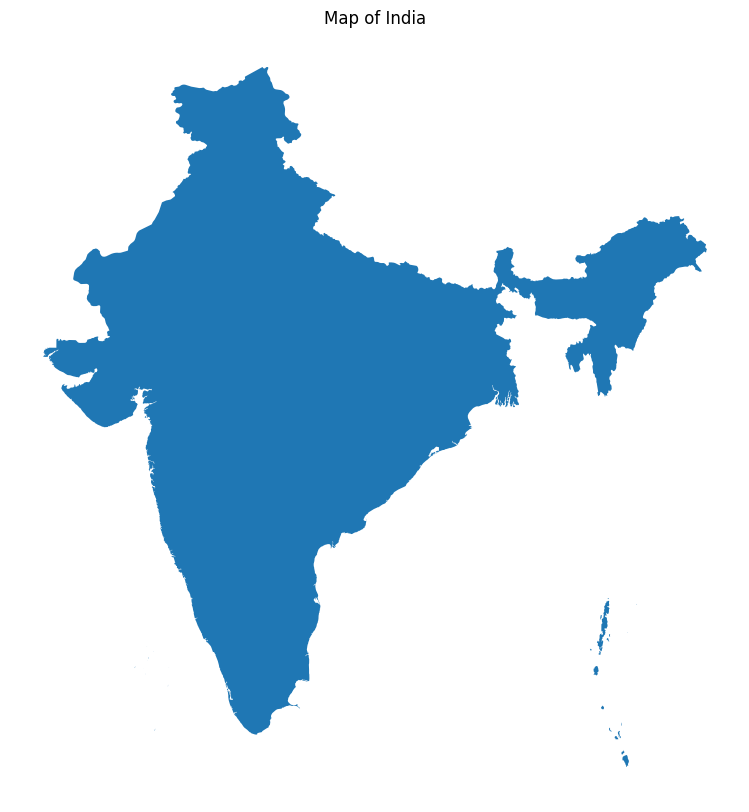

In [5]:
!wget https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson -O india.geojson

india_map = gpd.read_file('india.geojson')

india_map = india_map[india_map['ADMIN'] == 'India']

india_map.plot(figsize=(10, 10))
plt.title('Map of India')
plt.axis('off')  # Turn off the axis
plt.show()


In [6]:
def clean_value(value):
    if isinstance(value, str):
        value = value.replace('Â', '').replace('\xa0', '').strip()
        value = value.replace(' E', '').replace(' W', '').replace(' N', '').replace(' S', '')
        value = value.replace('-', '')
        value = value.replace(' -', '')
    return float(value)

df['Longitude'] = df['Longitude'].apply(clean_value)
df['Latitude'] = df['Latitude'].apply(clean_value)

In [7]:
from shapely.geometry import Point

maharashtra_df = df[df['StateName'] == 'MAHARASHTRA']

geometry = [Point(xy) for xy in zip(maharashtra_df['Longitude'], maharashtra_df['Latitude'])]
gdf_maharashtra = gpd.GeoDataFrame(maharashtra_df, geometry=geometry)

In [8]:
maharashtra_df.head(25)

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
934,Maharashtra Circle,Nagpur Region,Amaravati Division,Bhatkuli S.O,444602,PO,Non Delivery,AMRAVATI,MAHARASHTRA,20.907000,77.602600
37630,Maharashtra Circle,Nagpur Region,Chandrapur Division,Subai B.O,442905,BO,Delivery,CHANDRAPUR,MAHARASHTRA,19.573344,79.442259
37631,Maharashtra Circle,Nagpur Region,Chandrapur Division,Tembhuwahi B.O,442905,BO,Delivery,CHANDRAPUR,MAHARASHTRA,19.692433,79.357116
37632,Maharashtra Circle,Nagpur Region,Chandrapur Division,Vihirgaon B.O,442905,BO,Delivery,CHANDRAPUR,MAHARASHTRA,19.726809,79.453512
38709,Maharashtra Circle,Aurangabad Region,Osmanabad Division,Nilegaon B.O,413603,BO,Delivery,OSMANABAD,MAHARASHTRA,18.010041,76.071064
38710,Maharashtra Circle,Aurangabad Region,Osmanabad Division,Omerga Chivari B.O,413603,BO,Delivery,OSMANABAD,MAHARASHTRA,18.010041,76.071064
38711,Maharashtra Circle,Aurangabad Region,Osmanabad Division,Shahapur B.O,413603,BO,Delivery,OSMANABAD,MAHARASHTRA,18.010041,76.071064
38712,Maharashtra Circle,Aurangabad Region,Osmanabad Division,Sukta B.O,413504,BO,Delivery,OSMANABAD,MAHARASHTRA,18.449512,75.675819
38713,Maharashtra Circle,Aurangabad Region,Osmanabad Division,Uloop B.O,413504,BO,Delivery,OSMANABAD,MAHARASHTRA,18.449512,75.675819
38714,Maharashtra Circle,Aurangabad Region,Osmanabad Division,Walwad B.O,413504,BO,Delivery,OSMANABAD,MAHARASHTRA,18.449512,75.675819


<ipython-input-9-00f431584094>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  india = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


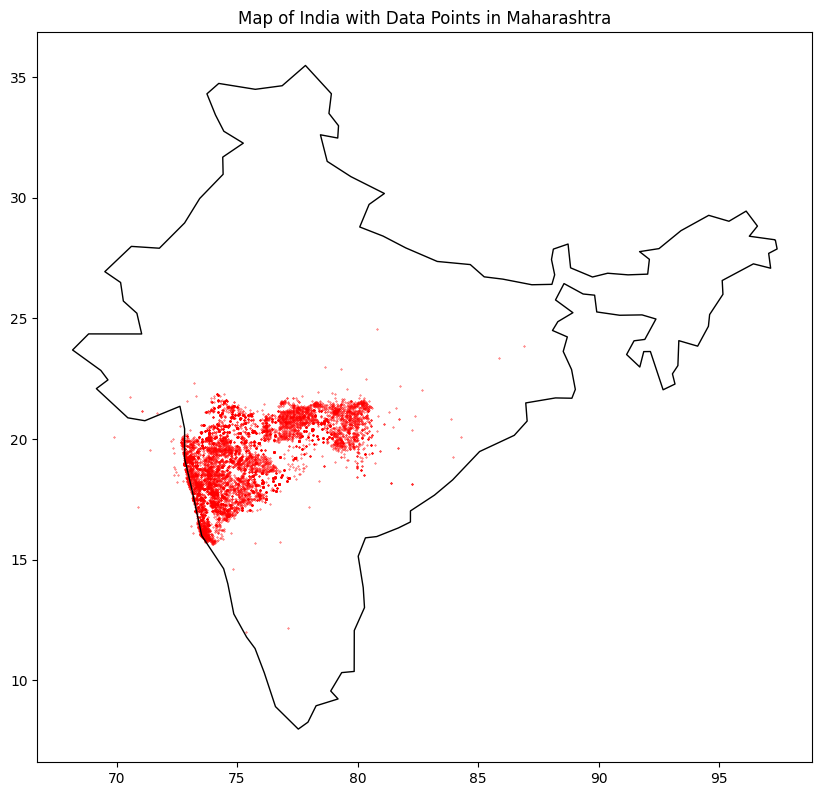

In [9]:
filtered_df = maharashtra_df[(maharashtra_df['Latitude'] >= 10) & (maharashtra_df['Latitude'] <= 25) & (maharashtra_df['Longitude'] >= 65) & (maharashtra_df['Longitude'] <= 90)]
filtered_df = filtered_df[['Latitude', 'Longitude']]

gdf_points = gpd.GeoDataFrame(
    filtered_df, geometry=gpd.points_from_xy(filtered_df.Longitude, filtered_df.Latitude))

india = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
india = india[india.name == "India"]

fig, ax = plt.subplots(figsize=(10, 10))
india.boundary.plot(ax=ax, linewidth=1, edgecolor="black")

gdf_points.plot(ax=ax, color='red', markersize=0.1)

ax.set_title('Map of India with Data Points in Maharashtra')
plt.show()

In [10]:
filtered_df.head(37)

,Latitude,Longitude
934,20.907000,77.602600
37630,19.573344,79.442259
37631,19.692433,79.357116
37632,19.726809,79.453512
38709,18.010041,76.071064
38710,18.010041,76.071064
38711,18.010041,76.071064
38712,18.449512,75.675819
38713,18.449512,75.675819
38714,18.449512,75.675819


In [ ]:
filtered_df.shape[0]

11598

In [11]:
def l2_norm(a, b):
    assert len(a) == len(b), "Vectors must have the same length"
    square = np.sum((a - b) ** 2)

    return np.sqrt(square)

def close_cluster(X, centroids):
    # distances = np.linalg.norm(X[:, None] - centroids, axis=2)  # Efficient broadcasting
    num_X = X.shape[0]
    num_centroids = centroids.shape[0]
    distances = np.zeros((num_X, num_centroids))

    for i in range(num_X):  #each data point
        for j in range(num_centroids):  #each centroid
            distances[i, j] = l2_norm(X[i], centroids[j])

    return np.argmin(distances, axis=1) #min distance for each column

In [12]:
def compute_centroids(X, id, K):
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        points = X[id == i]
        if len(points) > 0:
            centroids[i] = points.mean(axis=0)
        else:
            centroids[i] = np.zeros(X.shape[1])
    return centroids

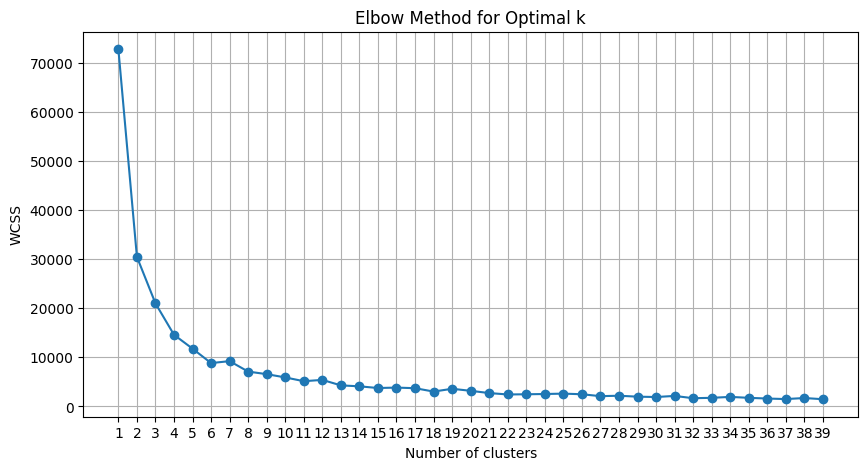

In [14]:
import numpy as np


def calculate_wcss(X, centroids, idx):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = X[idx == i]
        wcss += np.sum((cluster_points - centroids[i]) ** 2)
    return wcss

range_n_clusters = range(1, 40)
wcss = []

X = filtered_df.to_numpy()

for k in range_n_clusters:
    initial_centroids = X[np.random.choice(X.shape[0], k, replace=False), :]

    centroids = initial_centroids
    for _ in range(10):
        idx = close_cluster(X, centroids)
        centroids = compute_centroids(X, idx, k)

    wcss.append(calculate_wcss(X, centroids, idx))

plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()


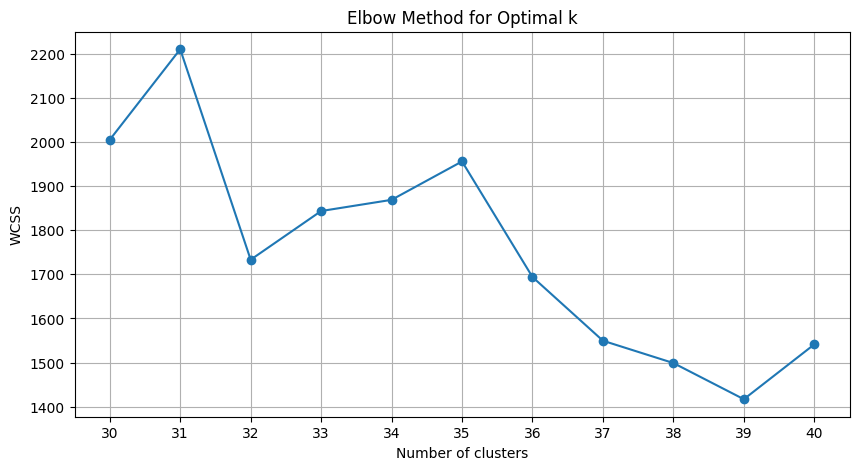

In [18]:
import numpy as np


def calculate_wcss(X, centroids, idx):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = X[idx == i]
        wcss += np.sum((cluster_points - centroids[i]) ** 2)
    return wcss

range_n_clusters = range(30, 41)
wcss = []

X = filtered_df.to_numpy()

for k in range_n_clusters:
    initial_centroids = X[np.random.choice(X.shape[0], k, replace=False), :]

    centroids = initial_centroids
    for _ in range(10):
        idx = close_cluster(X, centroids)
        centroids = compute_centroids(X, idx, k)

    wcss.append(calculate_wcss(X, centroids, idx))

plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()


<ipython-input-17-cd29eb2f923c>:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  india = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


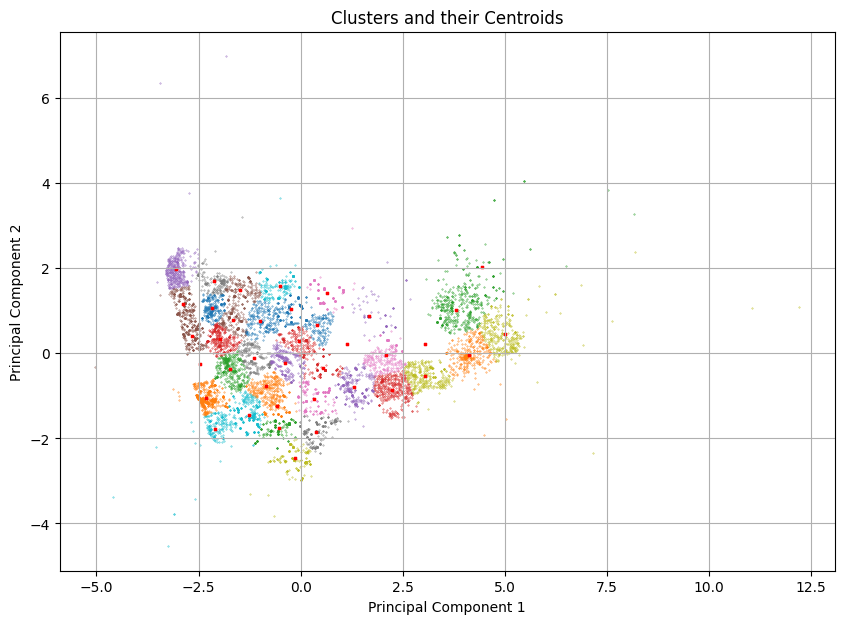

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(filtered_df)

# Plot the clusters
gdf_points = gpd.GeoDataFrame(
    filtered_df, geometry=gpd.points_from_xy(filtered_df.Longitude, filtered_df.Latitude))

# Load the India map with state boundaries
india = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
india = india[india.name == "India"]
india.boundary.plot(ax=ax, linewidth=1, edgecolor="black")

# Plot data points
gdf_points.plot(ax=ax, color='red', markersize=0.1)

ax.set_title('Map of India with Data Points in Maharashtra')
plt.show()

fig,ax=plt.subplots(figsize=(10, 7))

# Plot each cluster
for i in range(36):
    plt.scatter(X_pca[idx == i, 0], X_pca[idx == i, 1], label=f'Cluster {i+1}',s=0.1)

# Plot the centroids
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=3, c='red', marker='X', label='Centroids')

plt.title('Clusters and their Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# plt.legend()
plt.grid(True)
plt.show()